In the field of statistics, the assumption of normality is important because many statistical techniques perform calculations assuming the data is normally distributed. The techniques that assume Gaussian or Gaussian-like distribution are listed below:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Techniques That Assume Normality</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Hypothesis testing through t-test and z-test</td>
      </tr>
      <tr>
         <td class="text-center">Analysis of variance (ANOVA)</td>
      </tr>       
      <tr>
         <td class="text-center">Sequential Gaussian simulation in spatial analysis</td>
      </tr>
      <tr>
         <td class="text-center">Control limits in control chart</td>
      </tr>
   </tbody>
</table>

Unfortunately, many real-life data are not normal. Permeability distribution of rock samples is lognormal. Time required to repair a malfunctioning component follows exponential distribution, and reliability analysis for machine performance with respect to time follows Weibull distribution. What should you do if your data fails a normality test, or is not Gaussian-like? You have three options:

<ol class="rounded-list">
    <li><a href="#1.-Use-it-as-it-is-or-fit-non-normal-distribution">Use it as it is or fit non-normal distribution</a></li>
    <li><a href="#2.-Try-non-parametric-method">Try non-parametric method</a></li>
    <li><a href="#3.-Transform-the-data-into-normal-distribution">Transform the data into normal distribution</a></li>
</ol>

### 1. Use it as it is or fit non-normal distribution

Altough your data is known to follow normal distribution, it is possible that your data does not look normal when plotted, because there are too few samples. For example, test scores of college students follow a normal distribution. If you know for certain that your data is normally distributed by nature, then according to the Central Limit Theorem, your data will eventually become normal when you obtain a greater number of sample data.  This means that you can still use the famous standard deviation method to assign letter grades to students as shown in <a href="#fig1">figure (1)</a>, even if your students’ test scores do not look normally distributed. If you increase the number of students that takes your exam, the test score distribution will become more normal according to the Central Limit Theorem.

<div class="row give-margin-inline-plot" id="fig1">
    <div class="col-12"><img src="jupyter_images/test_score_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: assigning letter grades with standard deviation</p></div>    
</div>

On the other hand, if you have plenty enough samples to represent the true population, you can fit different types of distributions to better describe your data. Different methods exist for different distributions and maybe you will be able to achieve your goal without using techniques that strictly require Gaussian distribution. 

The code snippet below fits three different distributions on the sample data: lognormal, normal, and Weibull distributions. Through a visual inspection, it can be observed that the sample data is the best represented by a <i>lognormal distribution</i>. Once we know that the sample data follows lognormal distribution, we can move forward by employing techniques that assume lognormal distribution.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

In [4]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

# fit normal distribution
mean, std = stats.norm.fit(data, loc=0)
pdf_norm = stats.norm.pdf(data, mean, std)

# fit weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, loc=0)
pdf_weibull_min = stats.weibull_min.pdf(data, shape, loc, scale)

<IPython.core.display.Javascript object>


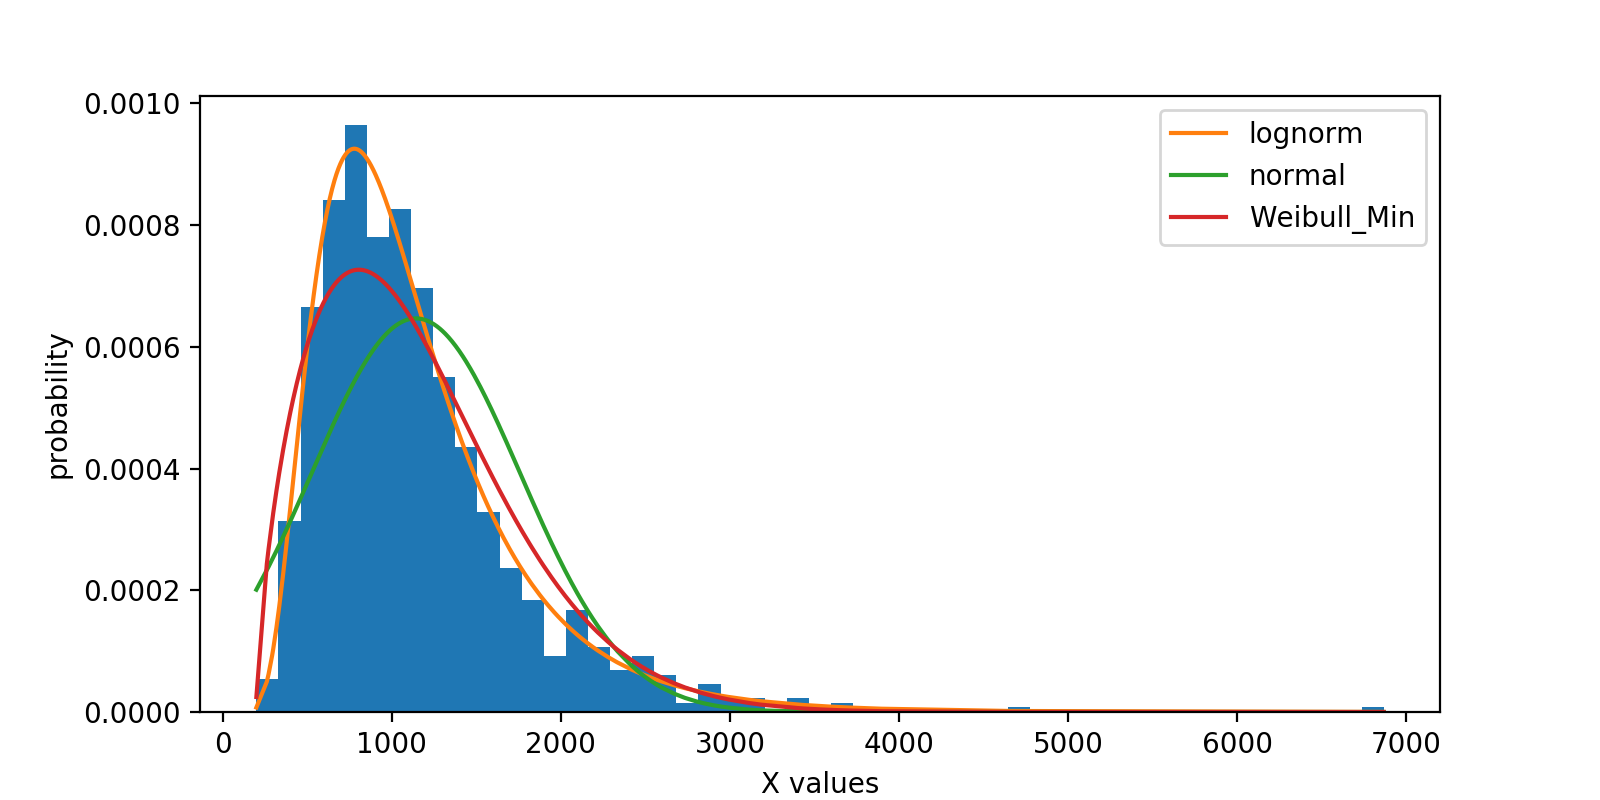

In [5]:
# visualize

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(data, bins='auto', density=True)
ax.plot(data, pdf_lognorm, label='lognorm')
ax.plot(data, pdf_norm, label='normal')
ax.plot(data, pdf_weibull_min, label='Weibull_Min')
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

<div class="alert alert-info">
    <h4>Notes: Normality test with hypothesis testing</h4>
    <p>Visual inspection is one option to assess the performance of the fitted distributions. The other option is to use hypothesis testing with Q-Q plots to numerically assess the performance of the fitted distribution. For example, if you want to numerically assess how well your data matches Gaussian distribution, you can test your hypothesis through D'Agostino-Pearson normality test, Anderson-Darling Test, or Shapiro-Wilk Test. Normality test with D’Agostino using <code>scipty.stats.normaltest()</code> is covered <a href="#2.5.-Normality-Test-with-Hypothesis-Testing">below</a>.</p>
</div>

### 2. Try non-parametric method

There are pros and cons for using non-parametric methods. The biggest pros is that it does not assume anything about the distribution. They are **distribution-free**. You do not need to know distribution shape, mean, standard devation, skewness, kurtosis, etc... All you need is just a set of sample data that is representative of a population. 

The fact that it does not assume anything about the distribution has another implication when you have small number of data - there's no need for Central Limit Theorem to be applied. Recall that the Central Limit Theorem states that the data will become more and more Gaussian-distributed as the number of samples increases. Techniques that assume normality of a distribution expect the sample data to follow Central Limit Theorem. Non-parametric methods improves the performance of statistical calculation when there are too few number of samples that the Central Limit Theorem can't be applied. However, it is important that those few samples are reasonably representative of the true population. If they are not, your result will be biased.

Non-parametric methods are geared toward hypothesis testing rather than estimation. Disadvantages of non-parametric methods include lack of power compared to more traditional approaches that require prior knowledge of a distribution. If you knew the distribution of your data with 100% certainty, there is no reason to use a non-parametric method.  Doing so would be a waste of perfectly good prior knowledge. 

Another disadvantage is that many non-parametric methods are computation intensive. For example, [Boostrapping](https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap) is a non-parametric resampling method. It can be used to compute confidence interval of statistics, but requires numerical iterations, whereas computing confidence interval with parametric methods does not require iterations. 

The following table lists non-parametric alternatives to techniques that assume normality of a distribution:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Techniques That Assume Normality</th>
         <th class="text-center">Non-Parametric Alternatives</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Confidence Interval with z-test</td>
         <td class="text-center">Bootstrapping</td>
      </tr>
      <tr>
         <td class="text-center">T-test</td>
         <td class="text-center">Mann-Whitney test; Mood's median test; Kruskal-Wallis test</td>
      </tr>       
      <tr>
         <td class="text-center">ANOVA</td>
         <td class="text-center">Mood's median test; Kruskal-Willis test</td>
      </tr>
      <tr>
         <td class="text-center">Paired t-test</td>
         <td class="text-center">One-sample sign test</td>
      </tr>
      <tr>
         <td class="text-center">F-test; Bartlett's test</td>
         <td class="text-center">Levene's test</td>
      </tr>
      <tr>
         <td class="text-center">Individuals control chart</td>
         <td class="text-center">Run Chart</td>
      </tr>
   </tbody>
</table>

<div class="alert alert-info">
    <h4>Notes</h4>
    <p>Parametric methods are the type of methods that assume a certain shape of a distribution. For example, the following equation is used to calculate the confidence interval of a mean of a distribution:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$\text{CI of mean} = \text{sample mean} \pm (\text{distribution score} \times \text{Standard Error} )$$</div></p>
    <p>The variable in the equation, <i>distribution score</i>, depends on the type of the distribution. If you do not know the distribution shape of your data, it is very difficult to obtain the value of the distribution score. </p> 
    <p>On the other hand, non-parametric methods do not assume anything about a distribution. A non-parametric alternative to calculate confidencer interval of mean is to use <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap">Bootstrapping</a>.</p>
</div>

### 3. Transform the data into normal distribution

The data is actually normally distributed, but it might need transformation to reveal its normality. For example, lognormal distribution becomes normal distribution after taking a log on it. The two plots below are plotted using the same data, just visualized in different x-axis scale. Observe how lognormal distribution looks normal when log is taken on the x-axis.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

In [7]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

<IPython.core.display.Javascript object>


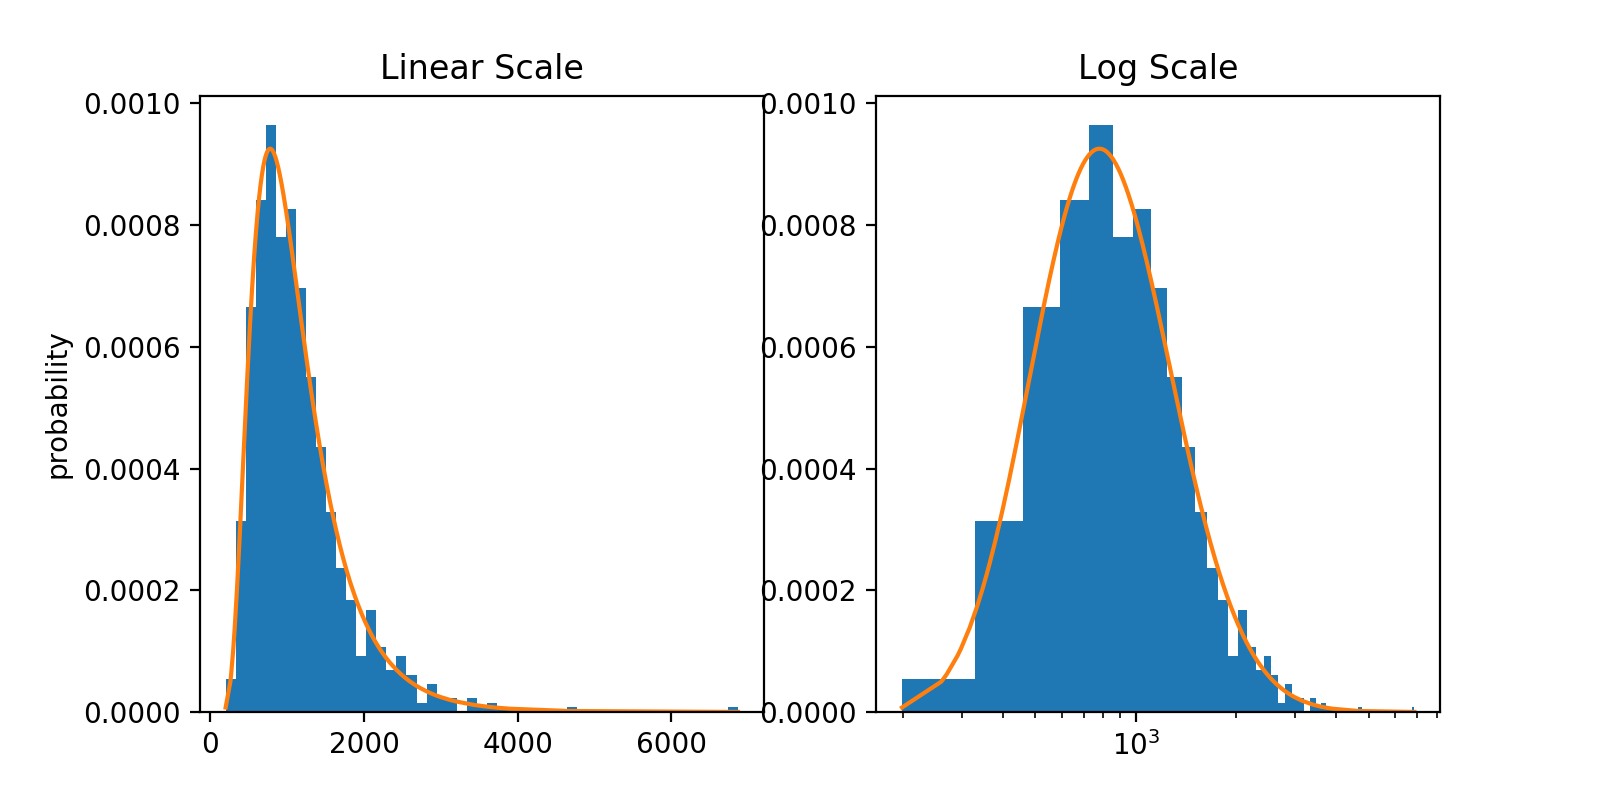

In [9]:
# visualize

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(data, bins='auto', density=True)
ax1.plot(data, pdf_lognorm)
ax1.set_ylabel('probability')
ax1.set_title('Linear Scale')

ax2.hist(data, bins='auto', density=True)
ax2.plot(data, pdf_lognorm)
ax2.set_xscale('log')
ax2.set_title('Log Scale');

Similar transformations can be done on the sample data to convert non-normal to normal distribution. Lognormal transformation is used to convert rock permeability distributions to normal distribution, and square root transformation is used to analyze biological population growth, such as bacterial colonies per petri dish. These types of transformations - rescaling the distribution by taking exponents or log - are called Power Transformations. **Box-Cox** transformation is the most popular technique within the family of power transformations.

# Box-Cox Transformation: Theory

> **Box-Cox Transformation** is a type of power transformation to convert non-normal data to normal data by raising the distribution to a power of lambda ($\lambda$). The algorithm can automatically decide the lambda ($\lambda$) parameter that best transforms the distribution into normal distribution.

Box-Cox transformation is a statistical technique known to have remedial effects on highly skewed data. Essentially it's just raising the distribution to a power of lambda ($\lambda$) to transform non-normal distribution into normal distribution. The lambda ($\lambda$) parameter for Box-Cox has a range of *-5 < $\lambda$ < 5*. If the lambda ($\lambda$) parameter is determined to be 2, then the distribution will be raised to a power of 2 — $Y^2$. The exception to this rule is when the lambda ($\lambda$) parameter is 0 - log will be taken to the distribution — log($Y$).

The below table shows how Box-Cox transformation raises the power of a distribution to different lambda ($\lambda$) values:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Lambda ($\lambda$)</th>
         <th class="text-center">Transformed Distribution ($Y^{'}$)</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">-2</td>
         <td class="text-center">$Y^{'} = \frac{1}{Y^2}$</td>
      </tr>
      <tr>
         <td class="text-center">-1</td>
         <td class="text-center">$Y^{'} = \frac{1}{Y^1}$</td>
      </tr>       
      <tr>
         <td class="text-center">-0.5</td>
         <td class="text-center">$Y^{'} = \frac{1}{sqrt(Y)}$</td>
      </tr>
      <tr>
         <td class="text-center">0</td>
         <td class="text-center">$Y^{'} = log(Y)$</td>
      </tr>
      <tr>
         <td class="text-center">0.5</td>
         <td class="text-center">$Y^{1} = sqrt(Y)$</td>
      </tr>
      <tr>
         <td class="text-center">1</td>
         <td class="text-center">$Y^{'} = Y$</td>
      </tr>
      <tr>
         <td class="text-center">2</td>
         <td class="text-center">$Y^{'} = Y^2$</td>
      </tr>       
   </tbody>
</table>

Although in the table lambda ($\lambda$) values of only *-2 < $\lambda$ < 2* were displayed, the actual algorithm has a range of *-5 < $\lambda$ < 5*. Also note that using a lambda ($\lambda$) value of 1 does not do anything to the distribution. If the Box-Cox algorithm spits out $\lambda = 1$, it probably means that your data is Gaussian-like or Gaussian enough to an extent that there is no need for transformation.

**All data to be positive and greater than 0 (Y > 0)**

Box-Cox transformation does not work if data is smaller than 0. This can easily be fixed by adding a constant ($C$) that will make all your data greater than zero. The transformation equation is then:

<p><center>$Y^{'} = (Y + C)^{\lambda}$</center></p>

**Python Code Implementation**

The code implementation for Box-Cox transformation is very simple with the help of [scipy.stats.boxcox()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).

<pre>
    <code class="language-python">
        from scipy import stats
        
        xt, lmbda = stats.boxcox(x)
    </code>
</pre>

<code>xt</code> is the transformed data, and <code>lmbda</code> is the lambda ($\lambda$) parameter. More detailed usage & analysis of Box-Cox will be covered in the next section.

# Box-Cox Transformation: Phone Call Duration - Gamma Distribution

The distribution for phone call duration follows Erlang distribution, a member of a family of Gamma distribution. When the shape parameter of Gamma distribution has an integer value, the distribution is the Erlang disribution. Since power transformation is known to work well with Gamma distribution, we can try Box-Cox transformation to turn non-normal data into normal data. The below code snippet demonstrates how a typical Gamma distribution looks like when plotted:

In [10]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [11]:
# random variable generation for gamma distribution

def generate_gamma_dist(shape):
    dist_gamma = sorted(stats.gamma.rvs(shape, loc=0, scale=1000, size=5000))
    shape, loc, scale = stats.gamma.fit(dist_gamma, loc=0)
    pdf_gamma = stats.gamma.pdf(dist_gamma, shape, loc, scale)
    return dist_gamma, pdf_gamma

<IPython.core.display.Javascript object>


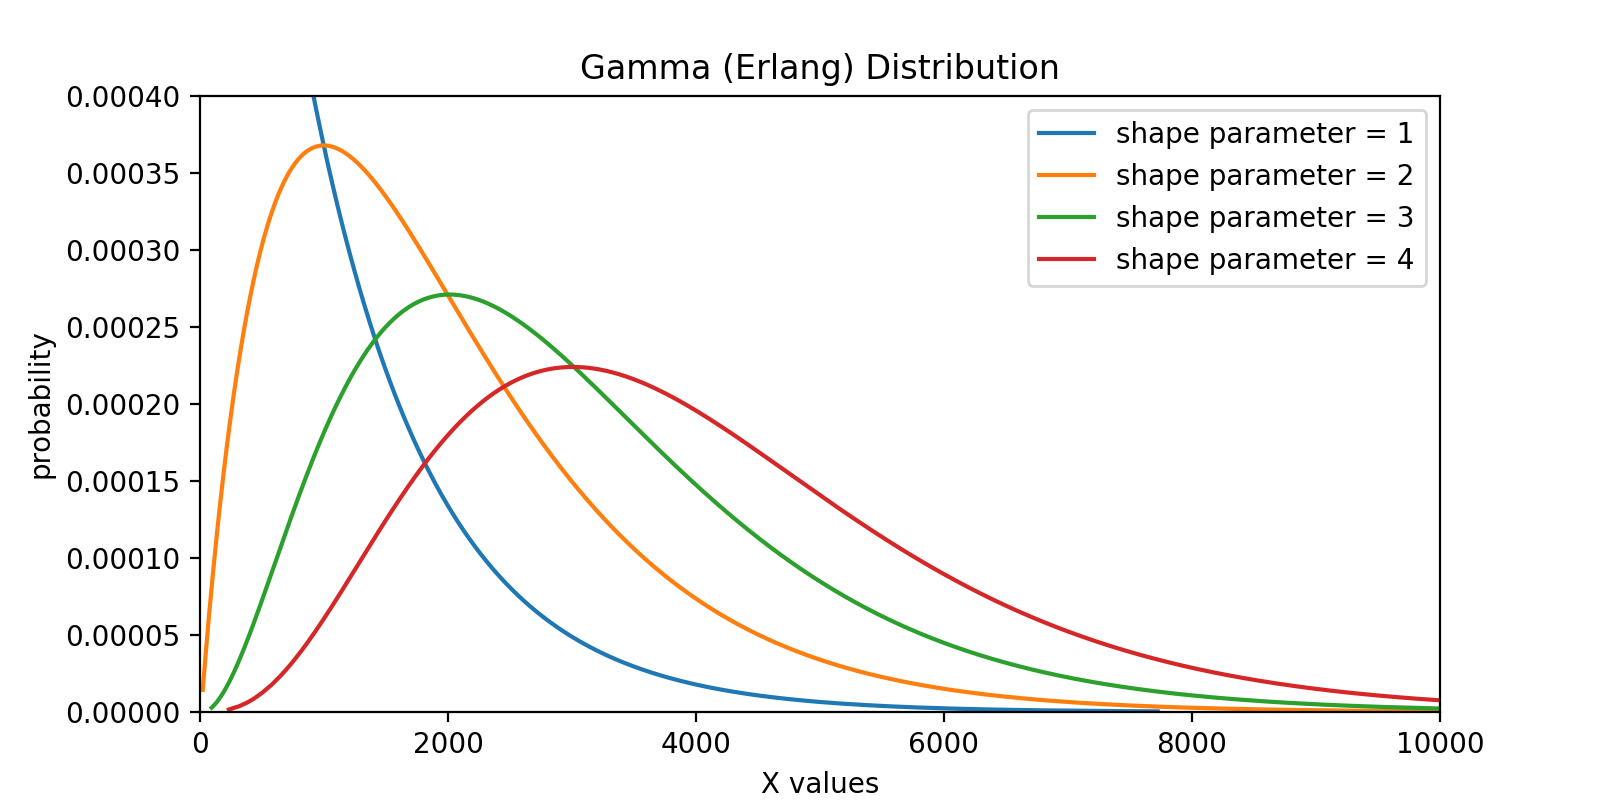

In [12]:
# visualize

fig, ax = plt.subplots(figsize=(8, 4))
for i in range(1, 5):
    x, y = generate_gamma_dist(i)
    ax.plot(x, y, label='shape parameter = %s' % i)
    
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.set_ylim(0, 0.0004)
ax.set_xlim(0, 10000)
ax.set_title('Gamma (Erlang) Distribution')
ax.legend();

## 1. Data Preparation

We will use phone calls data from [Enigma Public](https://public.enigma.com/datasets/nrc-event-reporting-calls-2010/b1a39934-514e-4c8e-b82d-5d2a013dc648). Enigma Public is a website that processes & hosts various public data and allows people to obtain them through file downloads or API access. The sample data originally comes from the [National Response Center](http://www.nrc.uscg.mil/) (NRC). They receive phone calls from anyone witnessing an oil spill, chemical release or maritime security incident and record that data.


For your convenience, I already downloaded the sample data and hosted it on this website. You can access the sample data directly by importing the file through <code>requests</code>.

In [2]:
import requests
import io
import pandas as pd

In [3]:
base_url = 'https://aegis4048.github.io/downloads/notebooks/sample_data/'
filename = '08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'

data = requests.get(base_url + filename).content
df   = pd.read_csv(io.StringIO(data.decode('utf-8')))
df.head()

,seqnos,date_time_received,date_time_complete,calltype,responsible_company,responsible_org_type,responsible_city,responsible_state,responsible_zip,source,serialid
0,946479,2010-07-03T21:11:31+00:00,2010-07-03T21:19:57+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15900
1,946480,2010-07-03T20:59:29+00:00,2010-07-03T21:16:22+00:00,INC,CHEVRON,PRIVATE ENTERPRISE,NaN,HI,NaN,WEB REPORT,15901
2,946481,2010-07-03T21:42:43+00:00,2010-07-03T21:53:07+00:00,INC,BP,PRIVATE ENTERPRISE,NaN,LA,NaN,TELEPHONE,15902
3,946482,2010-07-03T22:22:41+00:00,2010-07-03T22:34:07+00:00,INC,CHEVRON,PRIVATE ENTERPRISE,SAN LUIS OBISPO,CA,93401,TELEPHONE,15903
4,946483,2010-07-03T22:46:13+00:00,2010-07-03T22:50:24+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15904


### 1.1. Sample Data Processing

Since we are interested in the time ellapsed for each phone call, the primary columns of our interest are <code>date_time_received</code> and <code>date_time_complete</code>. However, the raw data is not in a numerical format that can be directly plotted on histogram; we will need to parse & process the time data. I chose <code>.iloc[11000: 12000, :]</code> because it would take too long time to process all ~30,000 rows of the original data. The data is then sorted by the timestamp column. 

**Process DateTime**

In [4]:
import datetime

In [5]:
def process_time(row):
    
    call_received = datetime.datetime.strptime(row['date_time_received'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    call_ended    = datetime.datetime.strptime(row['date_time_complete'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    
    time_ellapsed = call_ended - call_received

    row['Parsed Call Received'] = str(call_received)
    row['Parsed Call Ended'] = str(call_ended)
    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)

    return row

In [6]:
# df was defined above

parsed_df = df.iloc[11000: 12000, :].apply(process_time, axis=1).iloc[:, -4:]
parsed_df['Parsed Call Received'] = pd.to_datetime(parsed_df['Parsed Call Received'], format='%Y-%m-%d %H:%M:%S')
parsed_df['Parsed Call Ended'] = pd.to_datetime(parsed_df['Parsed Call Ended'], format='%Y-%m-%d %H:%M:%S')
parsed_df = parsed_df.sort_values(by = 'Parsed Call Received')
parsed_df.head()

,Parsed Call Received,Parsed Call Ended,Time Ellapsed,Time Ellapsed (minutes)
11000,2010-05-21 19:32:09,2010-05-21 19:43:35,0:11:26,11.4
11001,2010-05-21 19:54:40,2010-05-21 19:58:40,0:04:00,4.0
11002,2010-05-21 20:03:14,2010-05-21 20:09:11,0:05:57,6.0
11003,2010-05-21 20:04:26,2010-05-21 20:07:39,0:03:13,3.2
11004,2010-05-21 20:18:38,2010-05-21 20:27:45,0:09:07,9.1


**Drop Duplicate Rows**

The original data does not record the time to a precision of microseconds (<code>2010-07-03T21:11:31+00:00</code>). Due to the imprecision of the recorded data, there will be rows with duplicate <code>date_time_received</code> and <code>date_time_complete</code>. The data itself is not duplicate, but the data in datetime column is duplicate. Leaving them as they are and plotting them might mess up your plots. 

Observe the change in the row number of the data frame. It's the indication that there are rows with the same <code>date_time_received</code> values.

In [7]:
parsed_df.shape

(1000, 4)

In [8]:
new_parsed_df = parsed_df.drop_duplicates(subset=['Parsed Call Received'], keep=False)
new_parsed_df.shape

(998, 4)

## 2. Transformatoin

It can be observed that the phone call duration data does not follow normal distribution.

In [9]:
time_duration_orig = new_parsed_df['Time Ellapsed (minutes)'].values

<IPython.core.display.Javascript object>


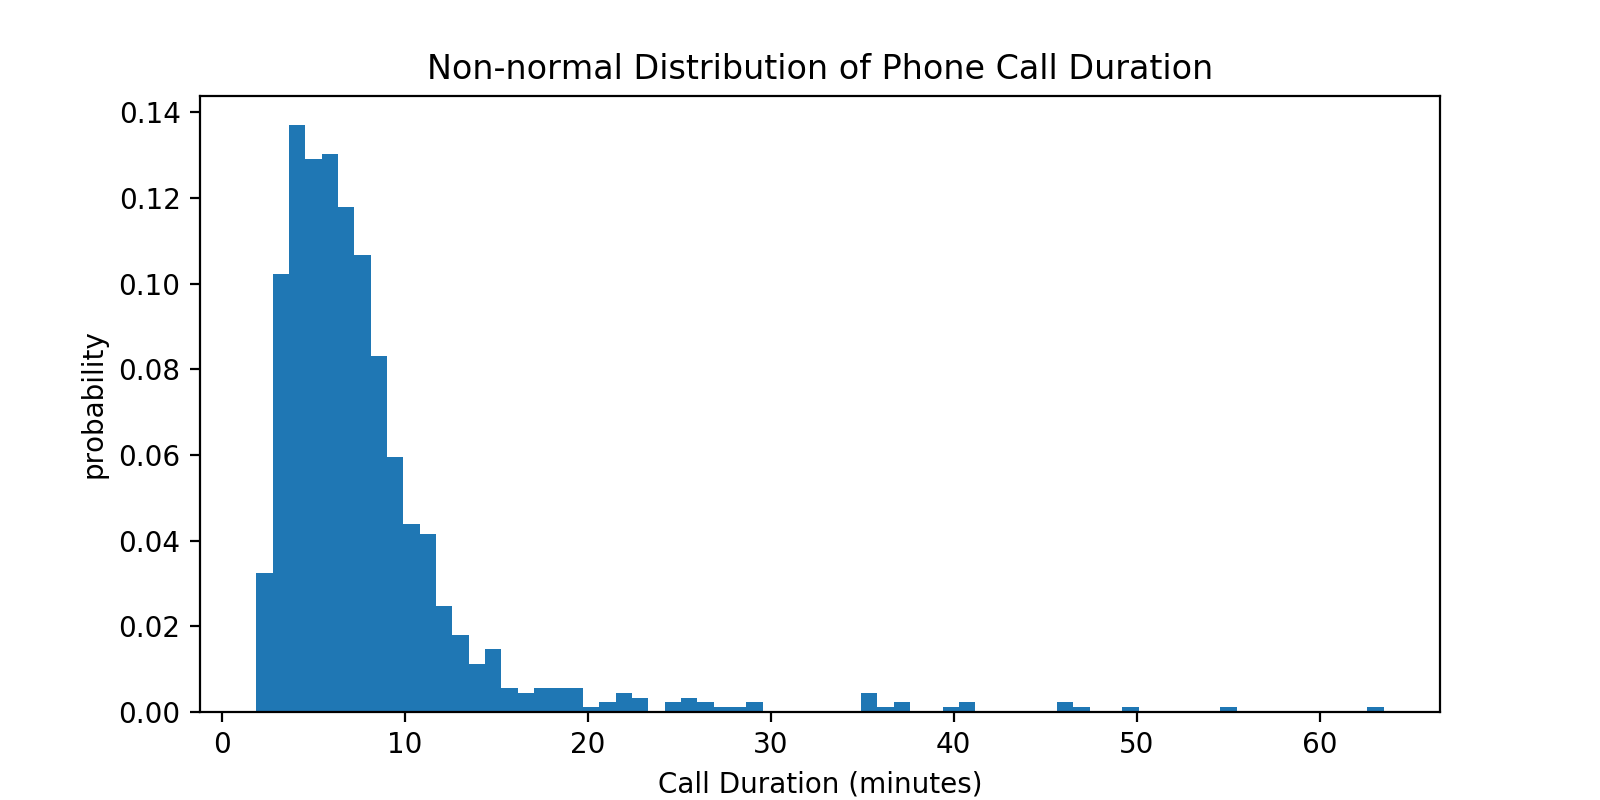

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(time_duration_orig, bins='auto', density=True)
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution of Phone Call Duration');

### 2.1. Box-Cox Transformation

The Python code implementation for Box-Cox is actually very simple. The below one-line code is it for transformation. More information about the Box-Cox function can be found in the [scipy documentaion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).

In [10]:
time_duration_trans, lmbda = stats.boxcox(time_duration_orig)

How does Box-Cox determine the best transformation parameter to obtain a distribution that is close to normal? It calculates correlation coefficient for different lambda ($\lambda$) values, and finds the one that maximizes the correlation coefficient. In our case, we find that the best lambda parameter is  $\lambda = -0.322$

Best lambda parameter = -0.322


<IPython.core.display.Javascript object>


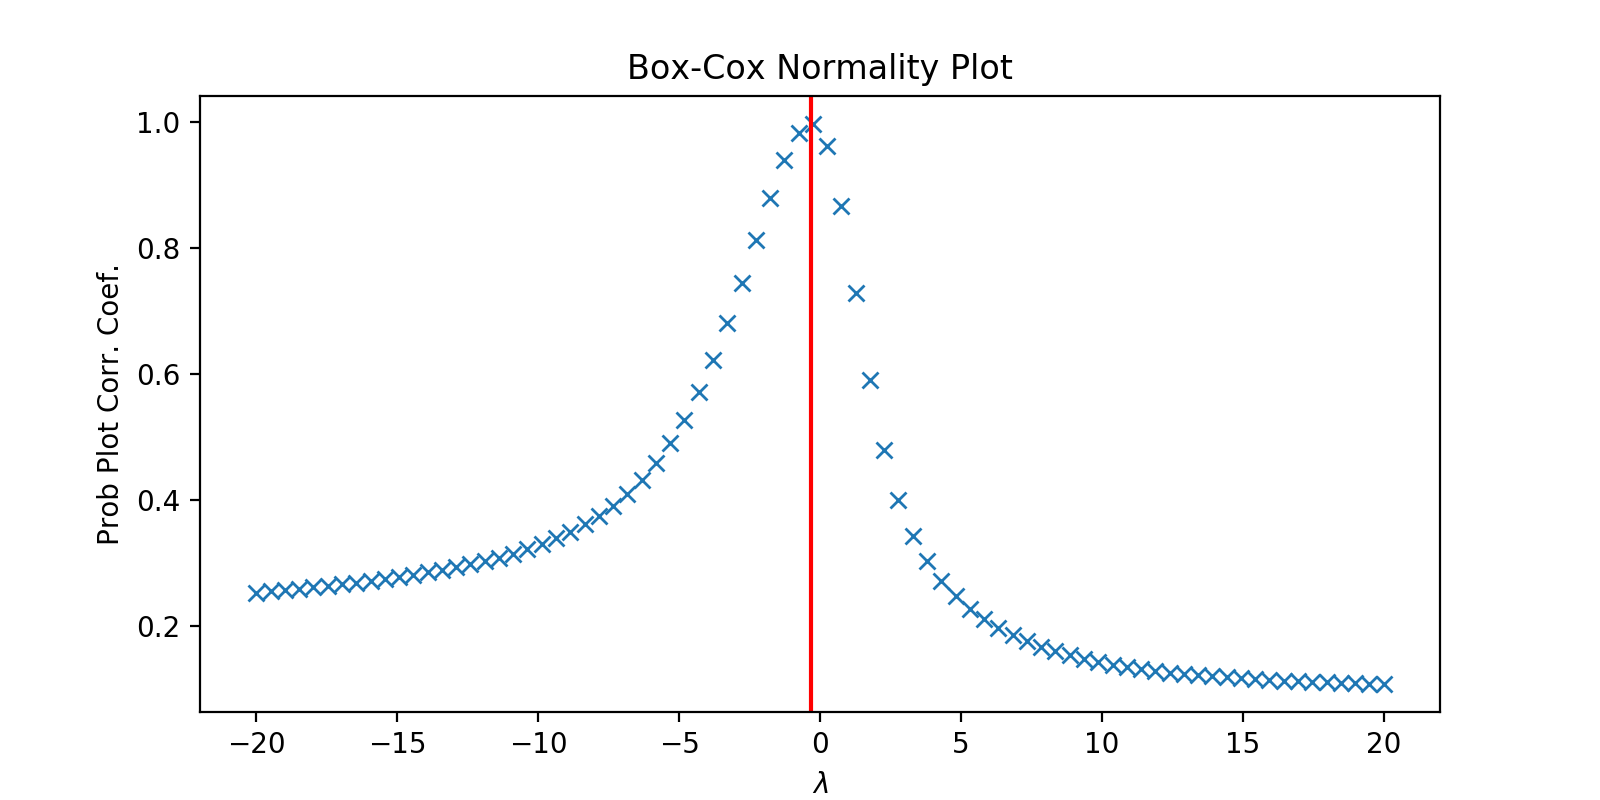

In [13]:
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(time_duration_orig, -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

### 2.2. Visual Inspection by Fitting Gaussian Distribution

One can visually inspect how good the transformation was by fitting a Gaussian distribution function.

In [14]:
# fit Gaussian distribution

time_duration_trans.sort()
mean, std = stats.norm.fit(time_duration_trans, loc=0)
pdf_norm = stats.norm.pdf(time_duration_trans, mean, std)

<IPython.core.display.Javascript object>


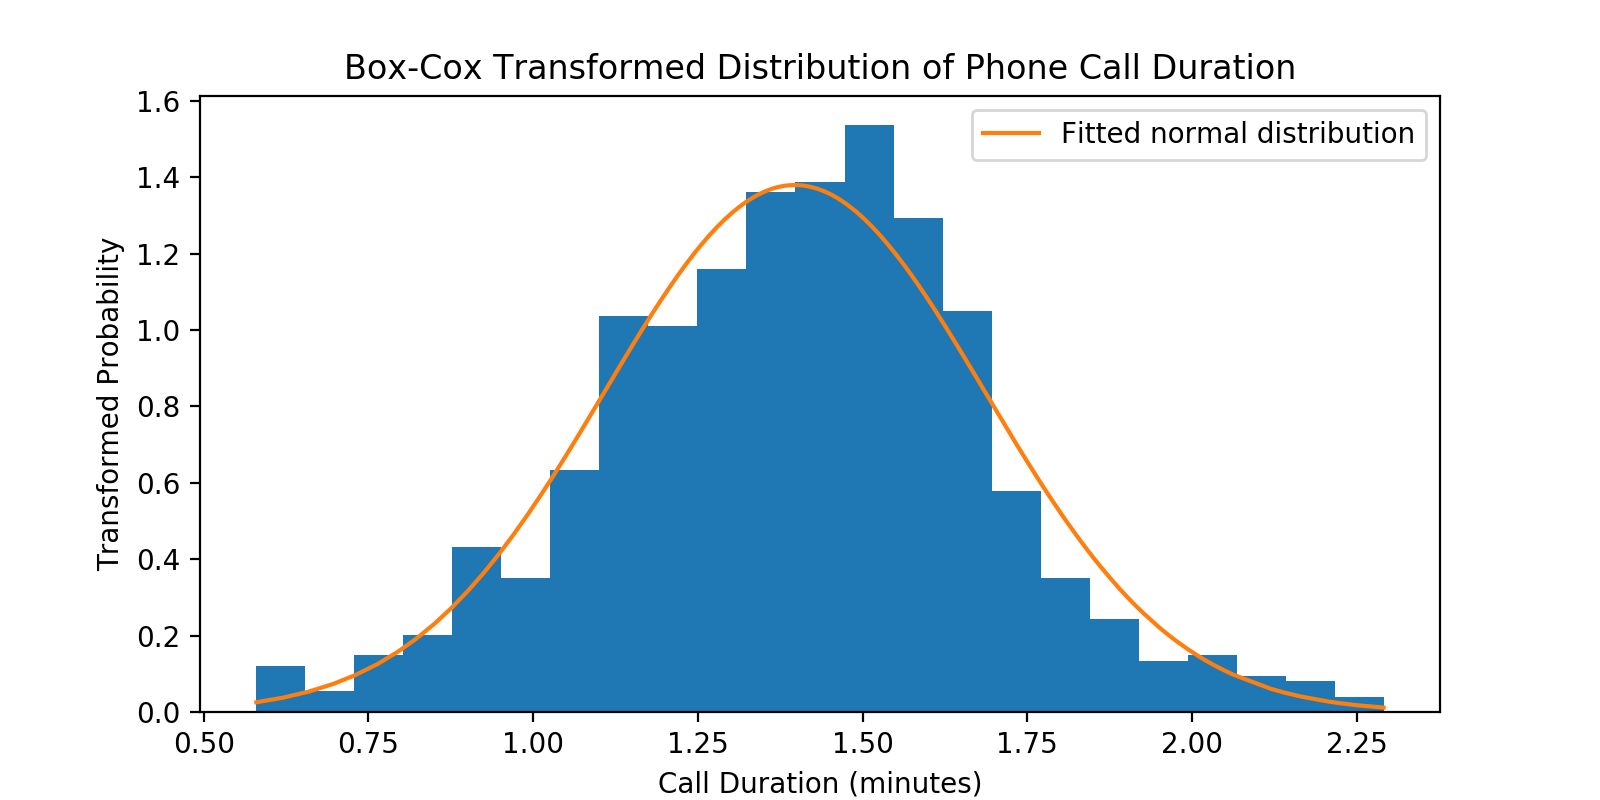

In [44]:
# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(time_duration_trans, bins='auto', density=True)
ax.plot(time_duration_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of Phone Call Duration')
ax.legend();

Based on the transformed historgram and the respective fitted normal distribuion, it seems that our Box-Cox transformation with $\lambda = -0.322$ worked well.

### 2.3. Visual Inspection with Q-Q Plots

Visual inspection can be done in a different way with Q-Q plots. The red straight line is the fitted theoretical Gaussian distribution function. If the scatter plot is closer to the red straight line, it means that the data is very close to Gaussian distribution. Deviation from the red line indicates that the data is most likely not Gaussian.

Recall that <code>time_duration_orig</code> is the original sample data, and <code>time_duration_trans</code> is the Box-Cox transformed data.

<IPython.core.display.Javascript object>


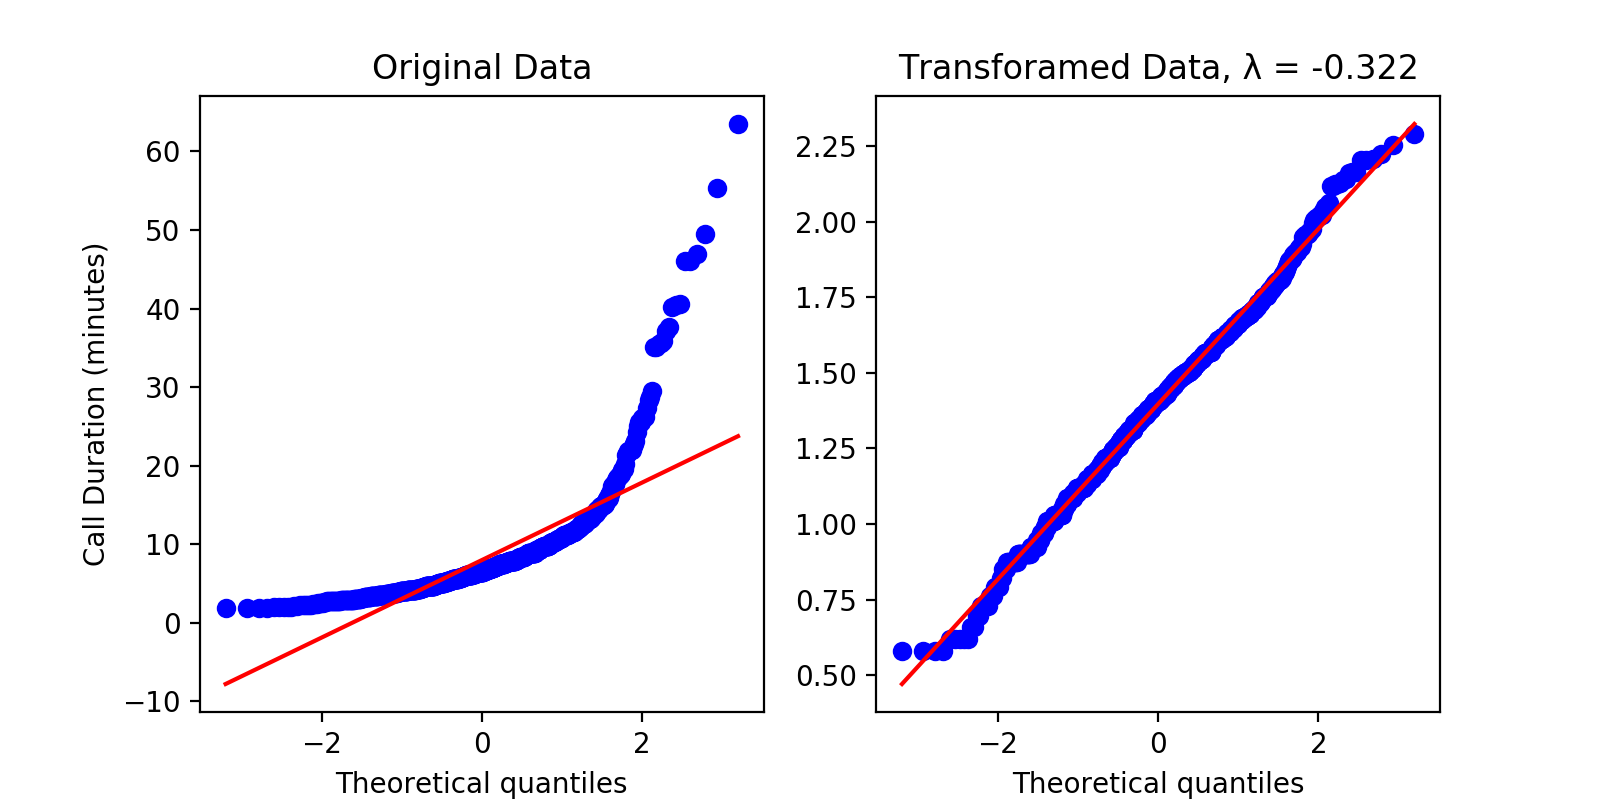

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = stats.probplot(time_duration_orig, dist=stats.norm, plot=ax1)
prob = stats.probplot(time_duration_trans, dist=stats.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Call Duration (minutes)')
ax2.set_title('Transforamed Data, λ = %s' % -0.322);
ax2.set_ylabel('');

No significant deviation is observed in Q-Q plots for the transformed data. The transformed data seems to follow Gaussian distribution well.

### 2.4. Normality Test with Hypothesis Testing

Sometimes one might prefer not to evaluate the normality of the transformed data with visual inspection. It is possible to run formal hypothesis testing and check normality in terms of statistical values with [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

<code>scipy.stats.normaltest()</code> returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, if the p-value is very small, we reject the null hypothesis. It means that it is unlikely that the data came from a normal distribution.

In [15]:
k2, p = stats.normaltest(time_duration_trans)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian (fails to reject the null hypothesis)')
else:
    print('\nThe transformed data does not look Gaussian (reject the null hypothesis)')


Chi-squared statistic = 2.453, p = 0.293

The transformed data is Gaussian (fails to reject the null hypothesis)


<hr>

The traditional alpha value of 5% was assumed ($\alpha = 0.05$). Based on the result of the hypothesis testing, it seems that the transformed data does not significantly deviate from a theoretical Gaussian distribution.

## 3. Back Transformation - Control Chart Analysis

One might wonder why we ever want to transform data into something different. What's the point of running analysis on transformed data that significantly deviates from the original data? Let's say that you have a sample data for human's life expectancy, which ranges between 0 and 100. Let's say that the distribution is not Gaussian, so you raised it to a power of 2 to convert it to Gaussian, making the transformed range to be between 0 to 10000. You calculate the mean of the transformed data and find out that the mean is 4,900 years. It is unreasonble to think that average life span of humans is 4,900 years. 

<div>
    $$
    \text{Transformed average life span} = 4,900 \,\, \text{years}
    $$
</div>

One must note that the whole point of data transformation is not to transform the data itself, but to use techniques that require a certain form of a distribution and acquire correct statistical values of your interest. This is where **Back Transformation** comes into play. You raised your sample data to a power of 2, and obtained the mean value of 4,900 years. Since you raised it to a power of 2, you will back transform it by lowering its power by 2.

<p style="overflow-wrap: break-word;"><center></center></p>

<div>
    $$
    \text{original average life span} = \sqrt{\text{transformed average life span}} = \sqrt{4,900 \,\, \text{years}} = 70 \,\, \text{years}
    $$
</div>

The concept of back transformation will be illustrated with **control chart** analysis.

### 3.1. Control Chart Basics

If you don't have a good understanding of what control chart is, I recommend you to read this [article](https://asq.org/quality-resources/control-chart). It is well written with clean, illustrative visualizations.

The upper and lower control limits (UCL and LCL) in control charts are defined as values that are three standard deviations from a mean ($\mu \space \pm \space 3 \sigma$). The control limits can be plotted on control chart with the following code snippet (note that <code>new_parsed_df</code> and <code>time_duration_orig</code> were defined above):

In [29]:
y = new_parsed_df['Parsed Call Received'].values

In [30]:
mean = np.mean(time_duration_orig)
std  = np.std(time_duration_orig)

upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

<IPython.core.display.Javascript object>


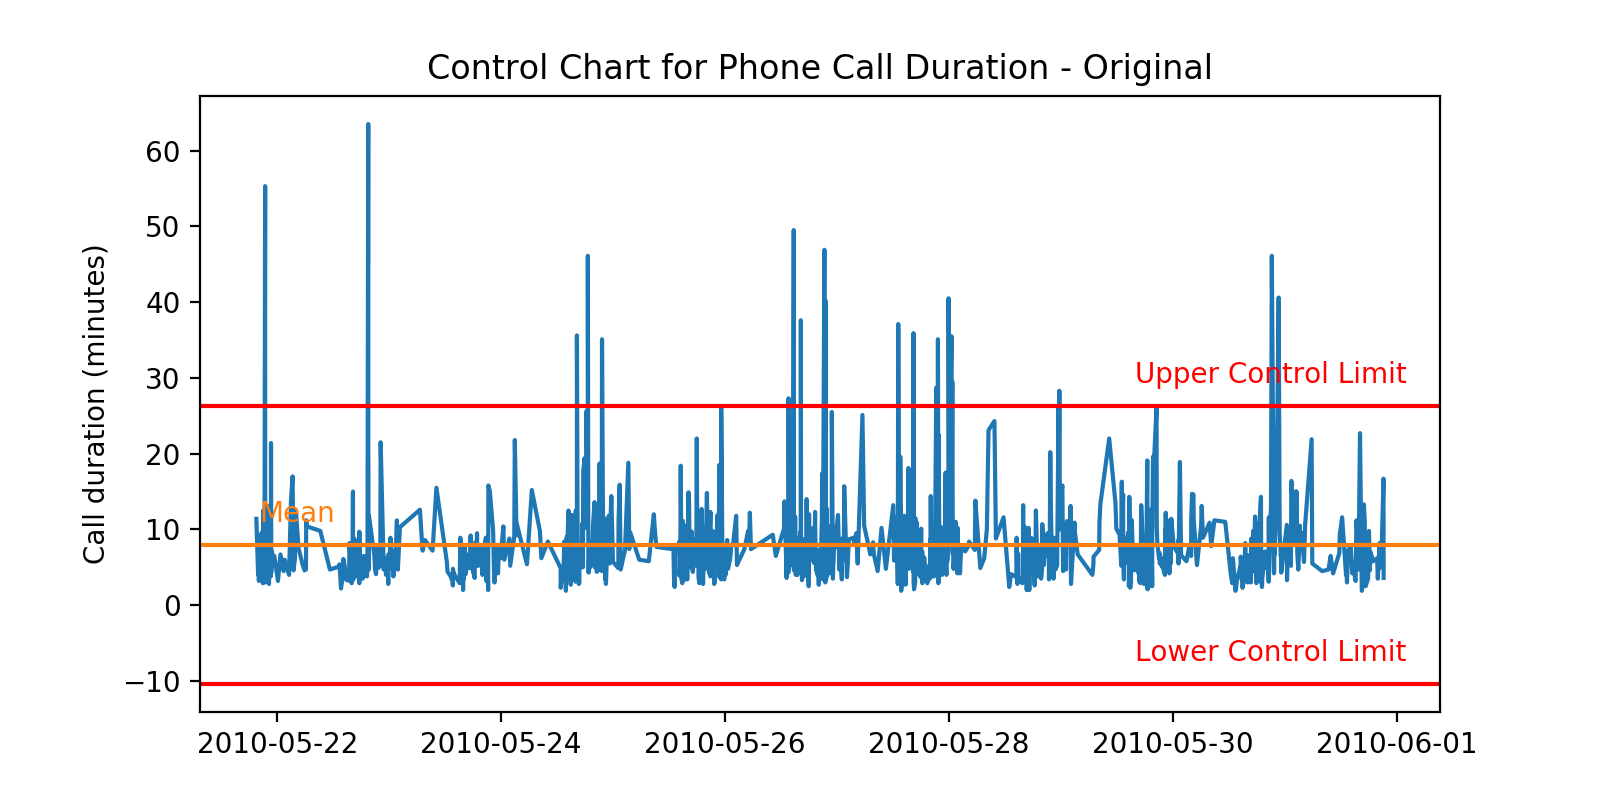

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(y, time_duration_orig)

ax.axhline(mean, color='C1')
ax.axhline(upper_limit, color='r')
ax.axhline(lower_limit, color='r');
ax.text(y[-200], upper_limit + 3, 'Upper Control Limit', color='r')
ax.text(y[-200], lower_limit + 3, 'Lower Control Limit', color='r')
ax.text(y[3], mean + 3, 'Mean', color='C1')
ax.set_ylabel('Call duration (minutes)');
ax.set_title('Control Chart for Phone Call Duration - Original');

A few interesting observations could be drawn from the control chart visualization.

<ol class="rounded-list">
    <li><p>Intervals dense number of phone calls are from daytime, and intervals with sparse number of phone calls are made from night time.</p></li>
    <li><p>The peaks seem to happen quite regularly. This makes sense considering how some phone calls take much longer than the others due to special circumstances</p></li>
    <li><p>No phone call duration is smaller than 0, and yet the lower control limit is -10, because the traditional control limit computation assumes normality of data, when phone call duration is not normally distributed.</p></li>
</ol>

### 3.2. Why Is Transformation Necessary?

The upper control limit plotted on the above visualization defines any phone calls that take longer than 26 minutes to be an outlier. But, are they really outliers? Some phone calls might take longer than 26 minutes due to some extreme circumstances. Moreover, those "outliers" seem to be happening too often to be considred outliers. 

This is happening because the calculation of control limits through plus/minus three standard deviation ($\pm \space 3 \sigma$) assumes that the data is normally distributed. The standard deviation method fails because the assumption of normality is not valid for the phone call duration distribution.

Box-Cox transformation is necessary.

In [32]:
time_duration_trans, lmbda = stats.boxcox(time_duration_orig)

In [33]:
mean_trans = np.mean(time_duration_trans)
std_trans  = np.std(time_duration_trans)

upper_limit_trans = mean_trans + 3 * std_trans
lower_limit_trans = mean_trans - 3 * std_trans

<IPython.core.display.Javascript object>


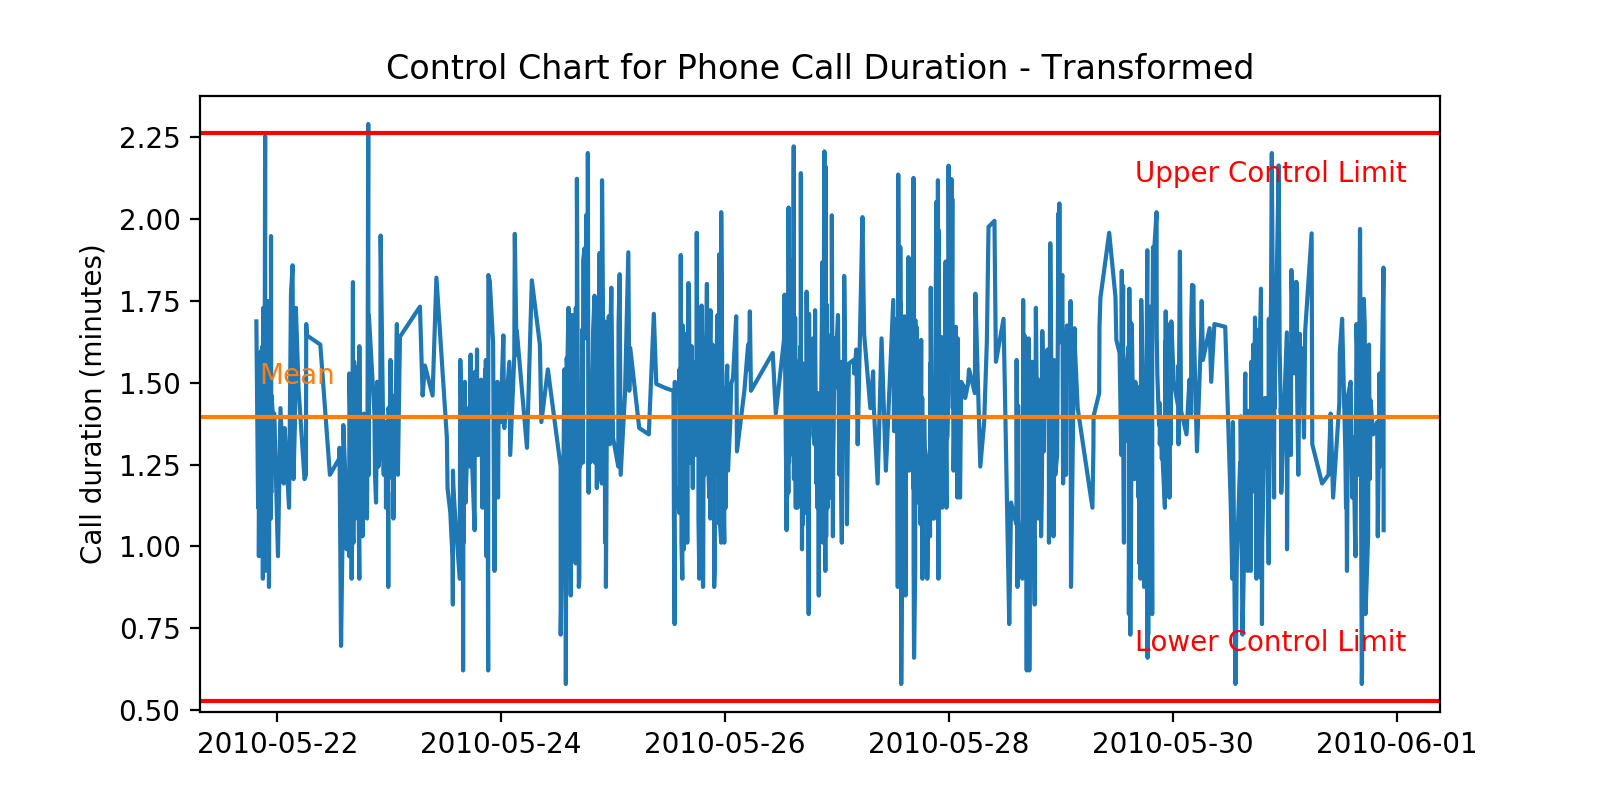

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(y, time_duration_trans)

ax.axhline(mean_trans, color='C1')
ax.axhline(upper_limit_trans, color='r')
ax.axhline(lower_limit_trans, color='r');
ax.text(y[-200], upper_limit_trans - 0.15, 'Upper Control Limit', color='r')
ax.text(y[-200], lower_limit_trans + 0.15, 'Lower Control Limit', color='r')
ax.text(y[3], mean_trans + 0.1, 'Mean', color='C1')
ax.set_ylabel('Call duration (minutes)');
ax.set_title('Control Chart for Phone Call Duration - Transformed');

A quick glance at the control chart of the transformed data tells us that the most of the phone calls were actually within the upper and lower control limit boundaries. $\pm \space 3 \sigma$ standard deviation method is now working because the assumption of normality is satisfied.

### 3.3. Back Transforming Control Limits

It is difficult for non-statisticians to understand that we are drawing conclusions from the transformed data. We need to back transform the calculated upper and lower control limits by taking the inverse of the lambda ($\lambda$) parameter we applied for Box-Cox transformation. [scipy.special.inv_boxcox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html) will do the job. 

In [35]:
from scipy.special import inv_boxcox

In [36]:
back_trans_upper_limits = inv_boxcox(upper_limit_trans, lmbda)
back_trans_lower_limits = inv_boxcox(lower_limit_trans, lmbda)
mean = np.mean(time_duration_orig)

<IPython.core.display.Javascript object>


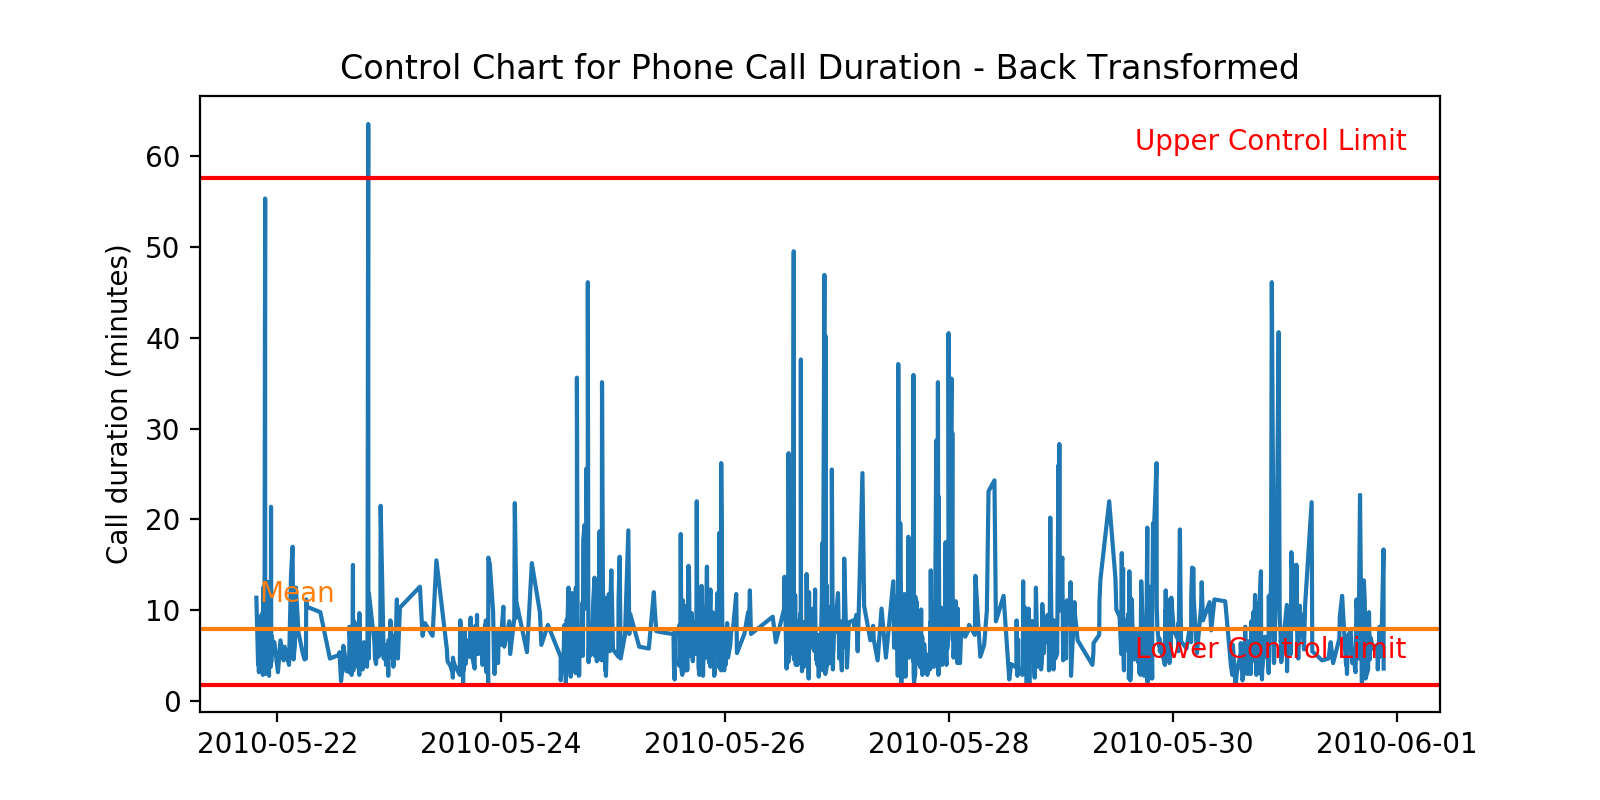

In [37]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(y, time_duration_orig)

ax.axhline(mean, color='C1')
ax.axhline(back_trans_upper_limits, color='r')
ax.axhline(back_trans_lower_limits, color='r');
ax.text(y[-200], back_trans_upper_limits + 3, 'Upper Control Limit', color='r')
ax.text(y[-200], back_trans_lower_limits + 3, 'Lower Control Limit', color='r')
ax.text(y[3], mean + 3, 'Mean', color='C1')
ax.set_ylabel('Call duration (minutes)');
ax.set_title('Control Chart for Phone Call Duration - Back Transformed');

After back-transforming the Box-Cox transformed data, we can now draw a conclusion that all of the phone calls, except for one, made to the [National Response Center](http://www.nrc.uscg.mil/) between 2010-05-22 to 2010-06-01 were within the control limits.